# Keep-it-dry! Preprocessing Part 1: Imputation using KNNImputer

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

## Read Data

In [2]:
df = pd.read_csv('./../kid_train.csv')
df_submission = pd.read_csv('./../kid_test.csv')

In [3]:
df_submission.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,26570,F,119.57,material_5,material_6,6,4,6,9,6,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,26571,F,113.51,material_5,material_6,6,4,11,8,0,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
2,26572,F,112.16,material_5,material_6,6,4,8,12,4,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
3,26573,F,112.72,material_5,material_6,6,4,8,11,10,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
4,26574,F,208.00,material_5,material_6,6,4,14,16,8,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044


### Check Data Type

In [4]:
df.dtypes

id                  int64
product_code       object
loading           float64
attribute_0        object
attribute_1        object
attribute_2         int64
attribute_3         int64
measurement_0       int64
measurement_1       int64
measurement_2       int64
measurement_3     float64
measurement_4     float64
measurement_5     float64
measurement_6     float64
measurement_7     float64
measurement_8     float64
measurement_9     float64
measurement_10    float64
measurement_11    float64
measurement_12    float64
measurement_13    float64
measurement_14    float64
measurement_15    float64
measurement_16    float64
measurement_17    float64
failure             int64
dtype: object

- Encoding needed for: product_code, attribute_0, attribute_1
- Scaling needed for: 
loading, measurement_3, measurement_4, measurement_5, measurement_6, measurement_7, measurement_8, measurement_9, measurement_10, measurement_11, measurement_12, measurement_13, measurement_14, measurement_15, measurement_16, measurement_17

### Check NaN Values

Text(0.5, 1.0, 'Heatmap of missing values')

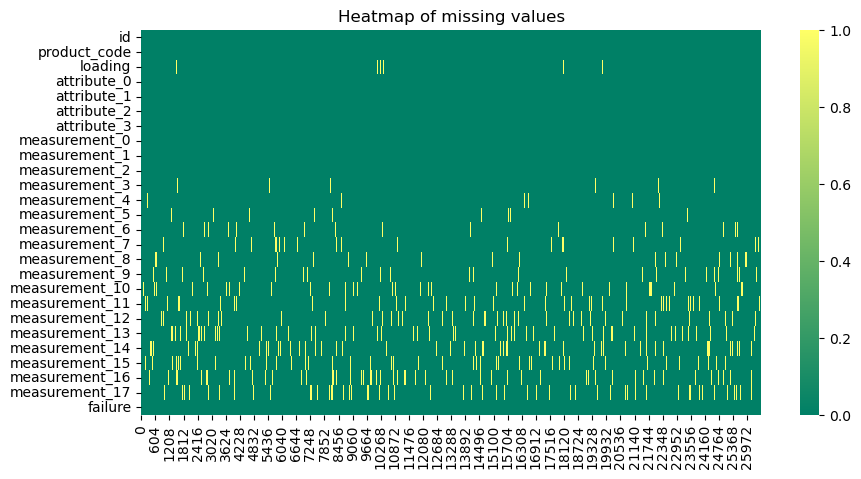

In [5]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isna().T, cmap='summer')
plt.title('Heatmap of missing values')

In [6]:
df.isna().sum()

id                   0
product_code         0
loading            250
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      381
measurement_4      538
measurement_5      676
measurement_6      796
measurement_7      937
measurement_8     1048
measurement_9     1227
measurement_10    1300
measurement_11    1468
measurement_12    1601
measurement_13    1774
measurement_14    1874
measurement_15    2009
measurement_16    2110
measurement_17    2284
failure              0
dtype: int64

## EDA
- Plot: continuous features using histplot, differentiated using 'failure'.
- Plot: categorical features using countplot, differentiated using 'failure'.

In [7]:
continuous_feats = df.select_dtypes(include=['float64']).columns
categorical_feats = df.select_dtypes(include=['object']).columns
nominal_feats = df.select_dtypes(include=['int64']).columns

In [8]:
print(nominal_feats)

Index(['id', 'attribute_2', 'attribute_3', 'measurement_0', 'measurement_1',
       'measurement_2', 'failure'],
      dtype='object')


### Continuous features

c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

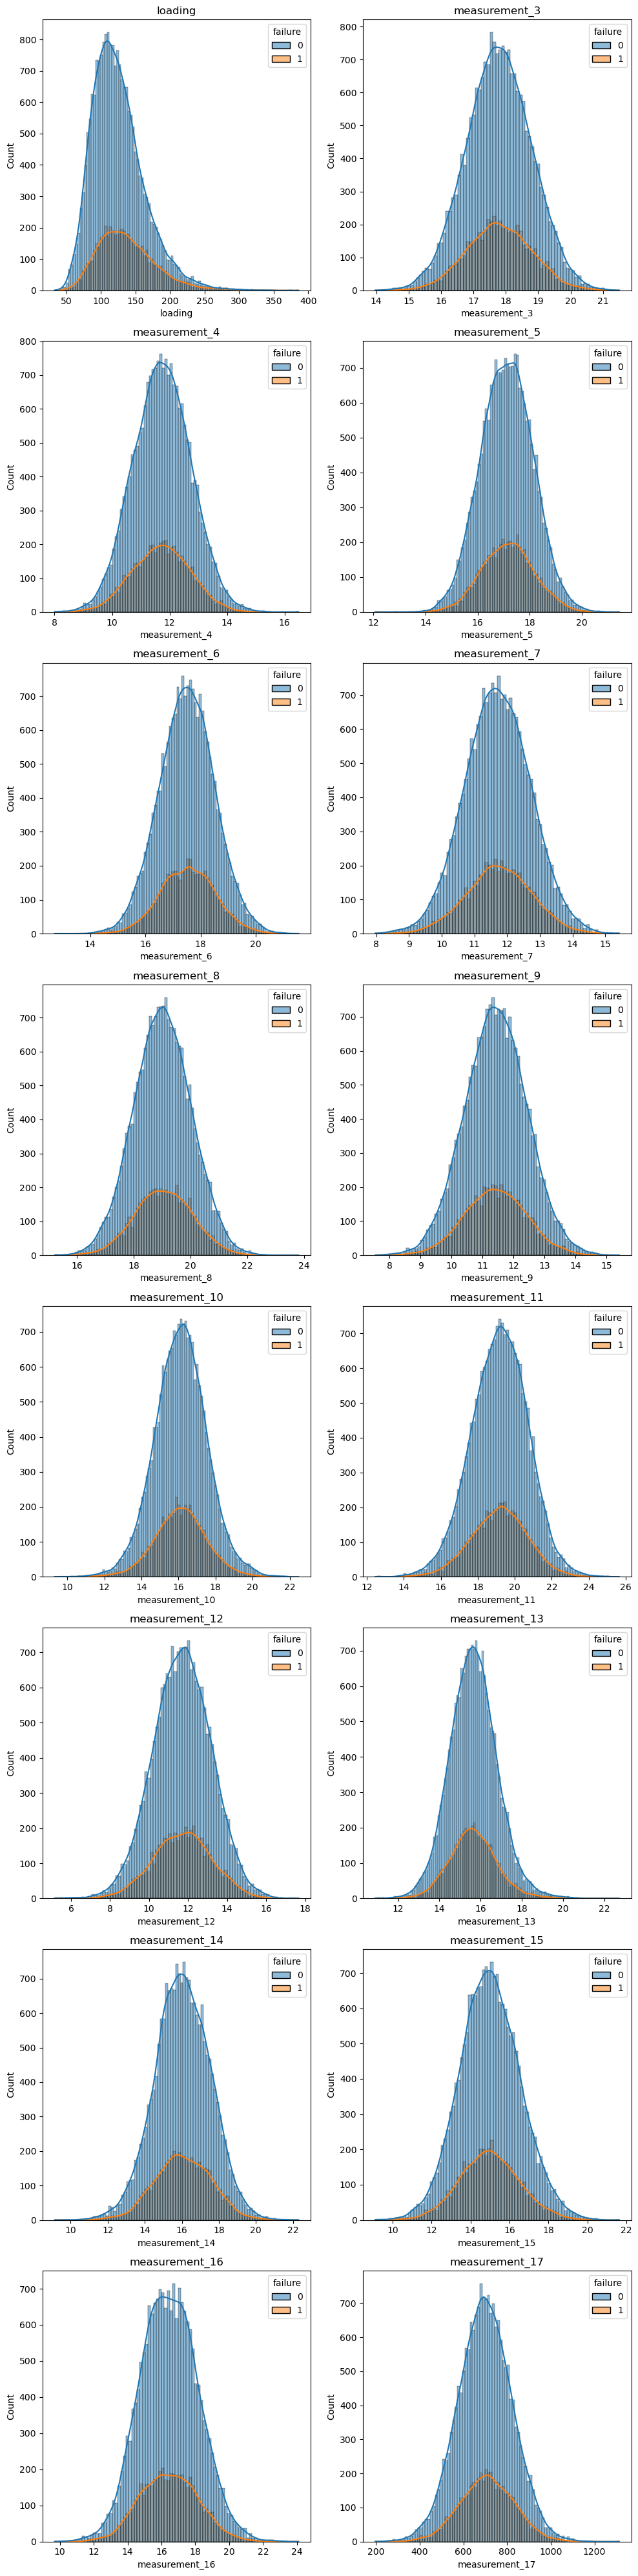

In [9]:
fig = plt.figure(figsize=(10, 40))

for i, feat in enumerate(continuous_feats):
    ax = fig.add_subplot(8, 2, i+1)
    sns.histplot(data=df, x=feat, hue="failure", kde=True, axes=ax)
    ax.set_title(feat)

fig.tight_layout()
plt.show()

### Categorical features

c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


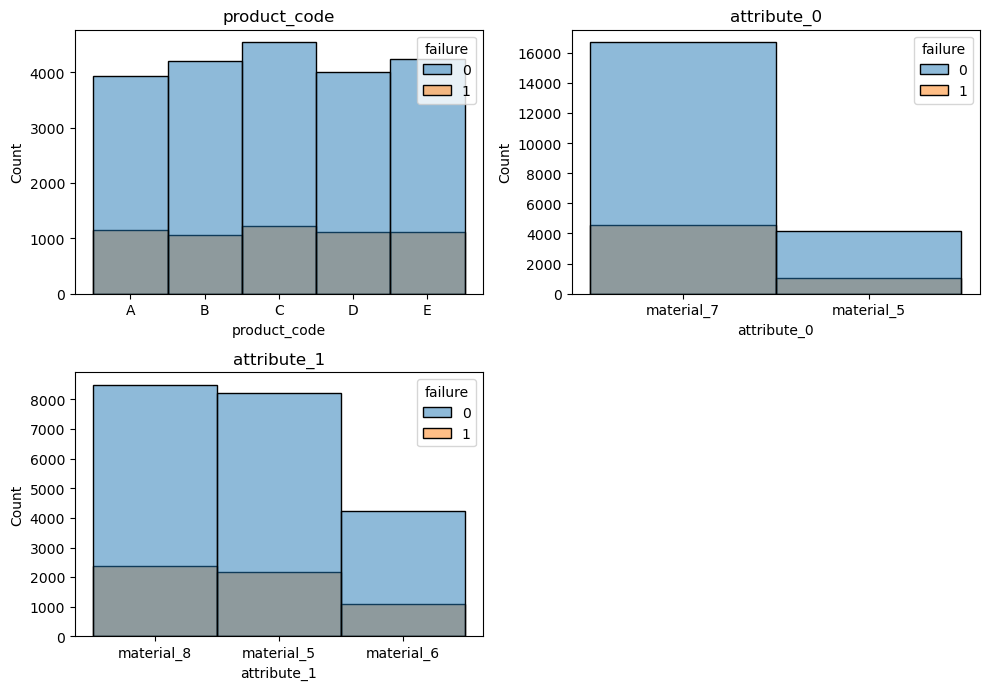

In [10]:
fig = plt.figure(figsize=(10, 10))

for i, feat in enumerate(categorical_feats):
    ax = fig.add_subplot(3, 2, i+1)
    sns.histplot(data=df, x=feat, hue="failure", axes=ax)
    ax.set_title(feat)

fig.tight_layout()
plt.show()

### Nominal features

c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

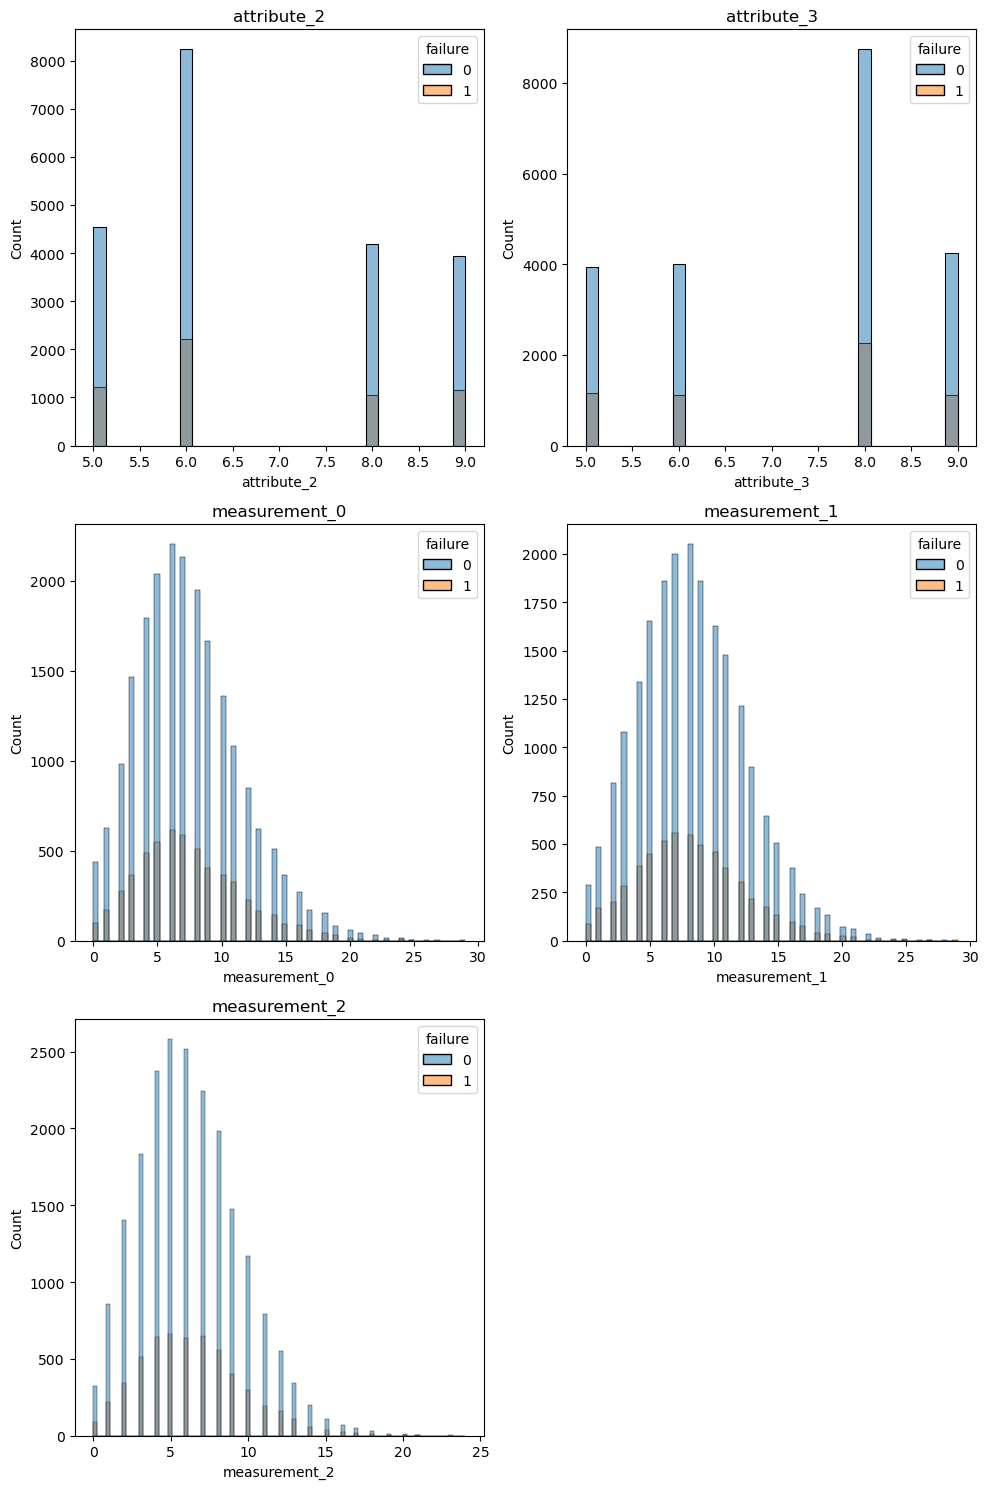

In [11]:
fig = plt.figure(figsize=(10, 15))

for i, feat in enumerate(nominal_feats[1:-1]):
    ax = fig.add_subplot(3, 2, i+1)
    sns.histplot(data=df, x=feat, hue="failure", axes=ax)
    ax.set_title(feat)

fig.tight_layout()
plt.show()

## Imputation
Available options:
1) Simple imputer, using 'mean' or 'most_frequent'
2) LinearRegression
3) Multiple LinearRegression
4) Polynomial Regression
5) Iterative Imputer

<Axes: >

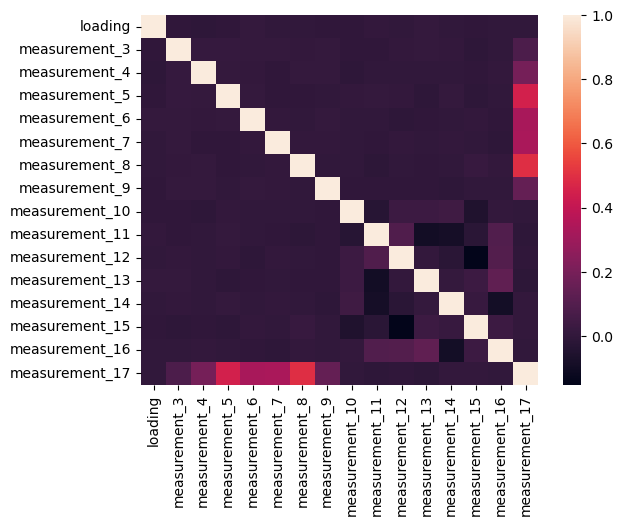

In [12]:
corr_matrix_cont = df[continuous_feats].corr()
sns.heatmap(corr_matrix_cont)

<Axes: >

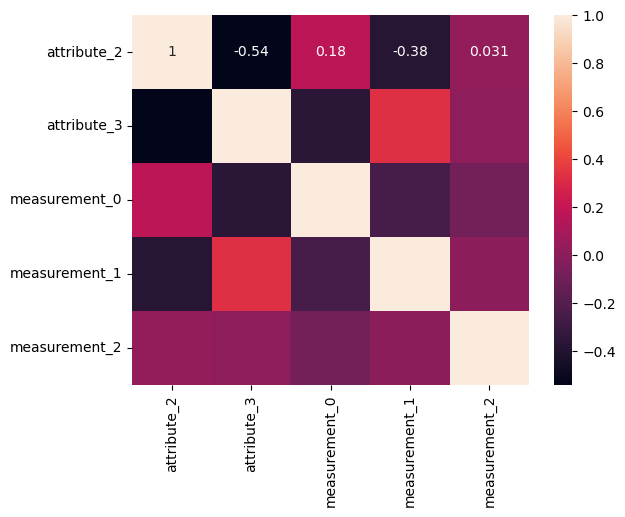

In [13]:
corr_matrix_nominal = df[nominal_feats[1:-1]].corr()
sns.heatmap(corr_matrix_nominal, annot=True)

In [14]:
df_corr_nominal = pd.DataFrame(corr_matrix_nominal)
df_corr_nominal

,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2
attribute_2,1.000000,-0.538697,0.175387,-0.377971,0.030522
attribute_3,-0.538697,1.000000,-0.370232,0.329233,0.013258
measurement_0,0.175387,-0.370232,1.000000,-0.255255,-0.083813
measurement_1,-0.377971,0.329233,-0.255255,1.000000,0.005032
measurement_2,0.030522,0.013258,-0.083813,0.005032,1.000000


<Axes: xlabel='attribute_2', ylabel='attribute_3'>

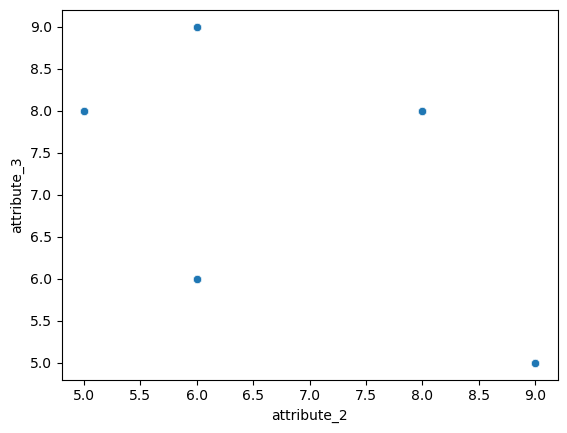

In [15]:
sns.scatterplot(data=df, x='attribute_2', y='attribute_3')

In [16]:
df[continuous_feats].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   loading         26320 non-null  float64
 1   measurement_3   26189 non-null  float64
 2   measurement_4   26032 non-null  float64
 3   measurement_5   25894 non-null  float64
 4   measurement_6   25774 non-null  float64
 5   measurement_7   25633 non-null  float64
 6   measurement_8   25522 non-null  float64
 7   measurement_9   25343 non-null  float64
 8   measurement_10  25270 non-null  float64
 9   measurement_11  25102 non-null  float64
 10  measurement_12  24969 non-null  float64
 11  measurement_13  24796 non-null  float64
 12  measurement_14  24696 non-null  float64
 13  measurement_15  24561 non-null  float64
 14  measurement_16  24460 non-null  float64
 15  measurement_17  24286 non-null  float64
dtypes: float64(16)
memory usage: 3.2 MB


As there's no strong linearity between features, we will proceed with KNNImputer.

### Continuous Features Imputation

In [17]:
df_all = pd.concat([df, df_submission], axis=0)
df_all_grouped = df_all.groupby('product_code')
df_all_grouped.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0.0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0.0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0.0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0.0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0.0
5100,5100,B,81.46,material_5,material_5,8,8,12,12,4,...,12.261,14.961,18.640,11.267,16.658,15.403,14.786,17.417,761.784,0.0
5101,5101,B,92.59,material_5,material_5,8,8,7,3,8,...,11.845,18.434,21.331,12.767,14.080,17.255,15.344,16.296,569.667,0.0
5102,5102,B,179.82,material_5,material_5,8,8,5,11,10,...,12.171,17.084,18.645,10.618,18.361,16.001,18.012,18.445,589.286,0.0
5103,5103,B,129.10,material_5,material_5,8,8,3,3,9,...,10.523,17.849,19.328,10.738,18.896,17.661,15.544,16.645,646.248,0.0
5104,5104,B,130.43,material_5,material_5,8,8,13,14,17,...,12.318,16.095,22.801,11.450,15.376,17.048,14.007,NaN,638.087,0.0


In [18]:
df_all.shape

(47345, 26)

In [19]:
# Separate ID
df_ids = set(df['id'])
df_submission_ids = set(df_submission['id'])
print("df_ids: ", len(df_ids))
print("df_submission_ids: ", len(df_submission_ids))

df_ids:  26570
df_submission_ids:  20775


### KNNImputer

#### GridSearchCV

In [20]:
# df_train_cv = df.copy()

# param_grid = {
#     'n_neighbors': [3, 5, 7, 9],
#     'weights': ['uniform', 'distance'],
#     'metric' : ['nan_euclidean']
# }

# def mse_scorer(y_true, y_predicted):
#     return mean_squared_error(y_true, y_predicted)

# imputer = KNNImputer()
# grid_search = GridSearchCV(estimator=imputer, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(df_train_cv[continuous_feats])

# best_params = grid_search.best_params_
# print("best params: ", best_params)

# knn_imputer_cv = grid_search.best_estimator_

#### KNNImputer per product_code

In [22]:
imputed_df = df_all.copy()

for group_name, group_df in df_all_grouped:
    # Drop 'product_code'
    df_curr = group_df[continuous_feats]
    knn_imputer_group = KNNImputer()
    # Fit and transform for current group
    knn_imputer_group.fit(df_curr)
    imputed_df.loc[imputed_df['product_code']==group_name, continuous_feats] = knn_imputer_group.transform(imputed_df.loc[imputed_df['product_code']==group_name, continuous_feats])

In [23]:
imputed_df.isna().sum()

id                    0
product_code          0
loading               0
attribute_0           0
attribute_1           0
attribute_2           0
attribute_3           0
measurement_0         0
measurement_1         0
measurement_2         0
measurement_3         0
measurement_4         0
measurement_5         0
measurement_6         0
measurement_7         0
measurement_8         0
measurement_9         0
measurement_10        0
measurement_11        0
measurement_12        0
measurement_13        0
measurement_14        0
measurement_15        0
measurement_16        0
measurement_17        0
failure           20775
dtype: int64

In [24]:
df = imputed_df[imputed_df['id'].isin(df_ids)]
df_submission = imputed_df[imputed_df['id'].isin(df_submission_ids)]
df_submission.drop('failure', axis=1, inplace=True)

C:\Users\RAYHAN EGAR\AppData\Local\Temp\ipykernel_28864\139654064.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_submission.drop('failure', axis=1, inplace=True)


In [25]:
df.shape

(26570, 26)

Text(0.5, 1.0, 'Heatmap of missing values after KNNImputer')

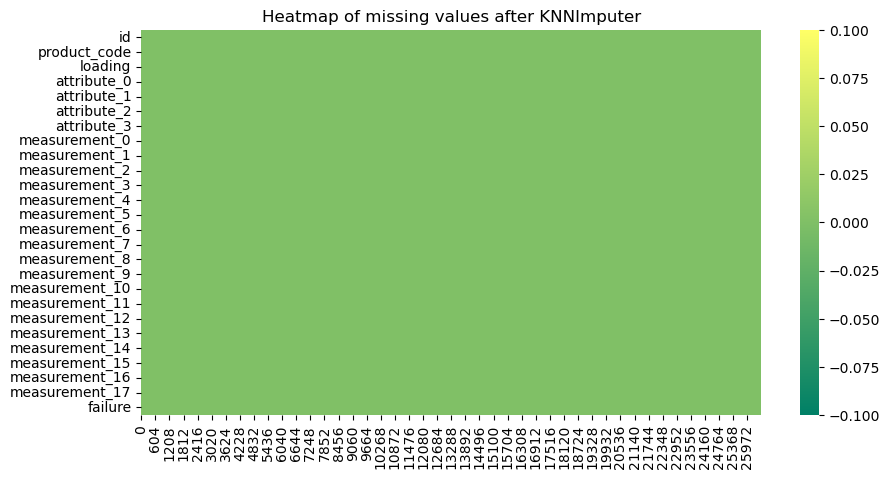

In [26]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isna().T, cmap='summer')
plt.title('Heatmap of missing values after KNNImputer')

Text(0.5, 1.0, 'Heatmap of missing values (Submission Test) after KNNImputer (GridSearchCV)')

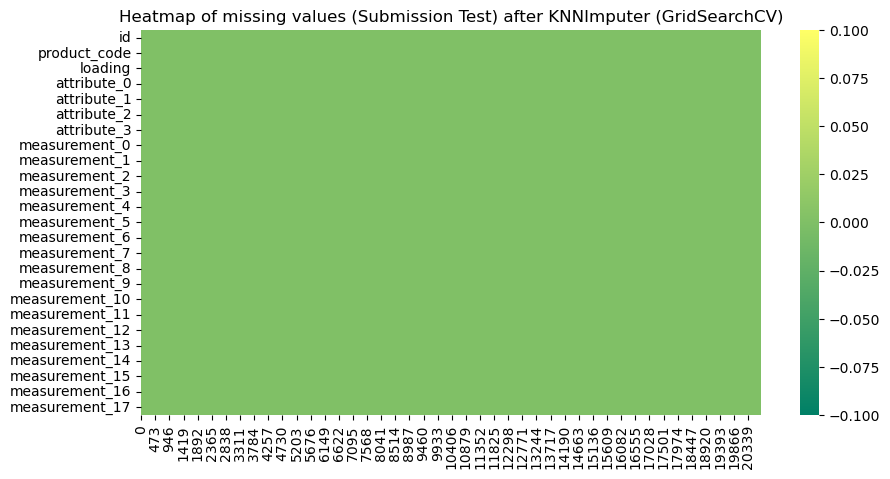

In [27]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_submission.isna().T, cmap='summer')
plt.title('Heatmap of missing values (Submission Test) after KNNImputer (GridSearchCV)')

In [28]:
df.to_csv('kid_train_knnimp.csv')
df_submission.to_csv('kid_test_knnimp.csv')